In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [2]:
gold_data=pd.read_csv('D:\gold_price\gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.shape

(2290, 6)

In [4]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])


correlation = gold_data.drop(columns=['Date']).corr()

In [7]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [8]:
correlation = gold_data.corr()

<Axes: >

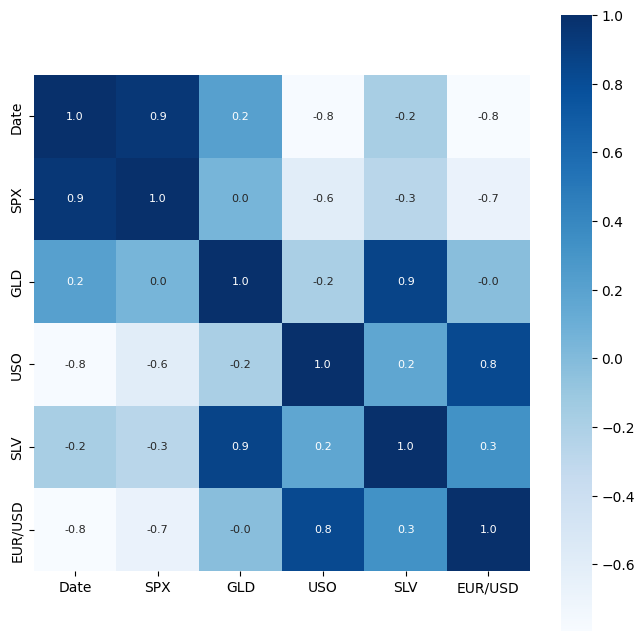

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


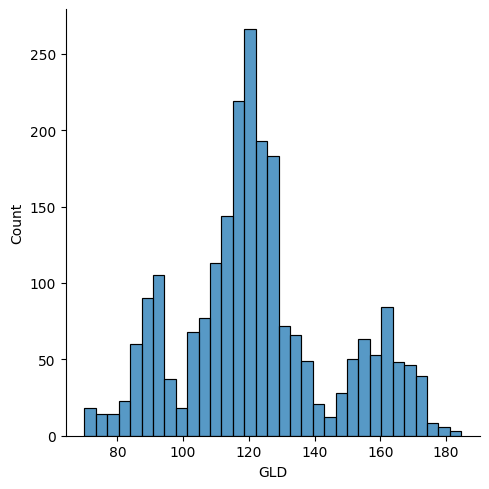

In [11]:
sns.displot(gold_data['GLD'])

In [12]:
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=2)


In [16]:
regressor = RandomForestRegressor(n_estimators=100) 

regressor.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
test_data_prediction = regressor.predict(X_test)

In [18]:
print(test_data_prediction)

[168.73949981  81.89459993 116.0333005  127.58800052 120.76340137
 154.68849726 150.54339839 126.05460046 117.47399861 125.88490093
 116.48520118 172.18100049 141.99859856 167.93789884 115.2692999
 117.87570031 138.45330262 169.94870139 159.70500343 156.64649857
 155.24010029 125.61819987 176.41540019 156.95260348 125.28430001
  93.93929979  77.27390014 120.44880006 119.10499955 167.47329911
  88.14990074 125.29560022  91.05380044 117.74860031 121.12159926
 136.59180154 115.54720111 115.33740082 147.27379988 107.29730057
 104.35560254  87.0528978  126.46170042 117.84359954 151.84989993
 119.56030023 108.37129996 108.06409829  93.21950072 127.08699773
  74.79540066 113.76419921 121.23400038 111.36229963 118.77929883
 120.45819958 159.04329906 167.40900143 146.89369672  85.74239869
  94.34820052  86.78959873  90.54939989 119.07490074 126.41120055
 127.43860009 170.31409982 122.2988994  117.4378992   98.62270041
 168.69720099 143.04759831 132.32510311 121.22460219 120.62479959
 119.804000

In [19]:
from sklearn.metrics import r2_score
error_score = r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9886254754045677
